# ID2223 – Lab 2:  Deep Learning with TensorFlow

For this lab we will use a dataset called Fashion-MNIST. The original MNIST dataset (Mixed National Institute of Standards and Technology database) is a database of handwritten digits that is commonly used for evaluating image classification algorithms. You can read more about the dataset in Yann LeCun’s MNIST page or Chris Olah’s visualizations of MNIST. MNIST is considered the HelloWorld dataset for Deep Learning, however, for this lab, MNIST is too easy to get very high accuracy on.

As such, we will use Fashion-MNIST - a drop-in replacement for the original MNIST, released by Zalando. It contains images of various articles of clothing and accessories: shirts, bags, shoes, and other fashion items. The Fashion MNIST training set contains 55,000 examples, and the test set contains 10,000 examples. Each example is a 28x28 grayscale image (just like the images in the original MNIST), associated with a label from 10 classes (t-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots).

This lab has the following goals:

- Learn how to setup and run a computational graph in Tensorflow
- Implement a single-layer as well as a multi-layer Neural Network in Tensorflow
- Combine different activation functions to increase the accuracy
- Tackle overfitting using regularization
- Further improve the performance by using Convolutional Layers
- Use hyperparameter optimization to improve prediction accuracy

In [1]:
# create data/fashion folder, if it doesn't exist
import os
if not os.path.exists("data/fashion"): os.makedirs("data/fashion")

In [2]:
# Download the labels from the Fashion MNIST data
#!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz --directory-prefix=./data/fashion/
#!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz --directory-prefix=./data/fashion/
# Download the images from the Fashion MNIST data
#!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz --directory-prefix=./data/fashion/
#!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz --directory-prefix=./data/fashion/

In [3]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data
# numpy library
import numpy as np
# random library
from random import randint
%matplotlib inline
tf.set_random_seed(0)

In [4]:
# load data
mnist = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


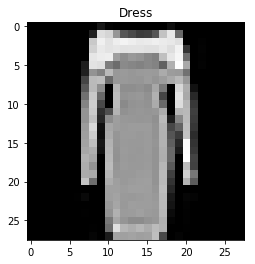

In [5]:
def gen_image(arr, im_title):
    image_data = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.title(im_title)
    plt.imshow(image_data, interpolation='nearest', cmap='gray')
    return plt

fash_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Produces a random image
im_index = randint(0, 100)
batch__X, batch__Y = mnist.test.next_batch(100)
gen_image(batch__X[im_index], fash_labels[np.nonzero(batch__Y[im_index] == 1)[0][0]]).show()

# Feedforward Neural Network with Back-Propagation

Now we are going to improve the accuracy by adding 4 more layers into our Neural Network. In a multi-layer, feedforward Neural Network, each layer instead of doing a weighted sum of all pixels, it does a weighted sum of the output of its previous layer.
Design your layers such that you will have 200, 100, 60, 30 and 10 neurons for each layer respectively

You can choose a different activation function for each hidden layer. For this task we want you to investigate two different combinations of activation function: 
- sigmoid and softmax,
- ReLU and softmax.

We always apply softmax in the last layer (the output layer) and the other activation functions in the hidden layers.

Task 2
- initialize all of the weights and biases
- redefine your model by connecting the output of each layer to the input of the next layer
- calculate the Logits (scores)
- use a specific cross-entropy function to calculate loss using logits

Finally, analyse your results and try to answer the following questions:

- What is the maximum accuracy that you can get in each setting for running your model with 10000 iterations?
- Is there a big difference between the convergence rate of the sigmoid and the ReLU? 
- If yes, what is the reason for the difference?
- What is the reason that we use the softmax in our output layer?
- By zooming into the second half of the epochs in accuracy and loss plot, do you see any strange behaviour? 
- What is the reason and how you can overcome them? (e.g., look at fluctuations or sudden loss increase after a period of decreasing loss).

In [6]:
# 1. Define Variables and Placeholders
num_pixels = 28
num_inputs = num_pixels*num_pixels
num_outputs = 10
gd_learning_rate = 0.5
ad_learning_rate = 0.005

num_hidd_1 = 200
num_hidd_2 = 100
num_hidd_3 = 60
num_hidd_4 = 30

X = tf.placeholder(tf.float32, [None, num_pixels, num_pixels, 1], name="X") #(None) will index the images in the mini-batch
Y_ = tf.placeholder(tf.float32,[None, num_outputs], name="Y_") # correct answers(labels)

# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([num_inputs, num_hidd_1], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([num_hidd_1, num_hidd_2], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([num_hidd_2, num_hidd_3], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([num_hidd_3, num_hidd_4], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([num_hidd_4, num_outputs],stddev=0.1))

B1 = tf.Variable(tf.zeros([num_hidd_1]))
B2 = tf.Variable(tf.zeros([num_hidd_2]))
B3 = tf.Variable(tf.zeros([num_hidd_3]))
B4 = tf.Variable(tf.zeros([num_hidd_4]))
B5 = tf.Variable(tf.zeros([num_outputs]))

XX = tf.reshape(X, [-1, num_inputs]) # flatten the images into a single line of pixels

In [7]:
# 2. Define the model: ReLU Activation
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)

In [ ]:
# 2. Define the model: SIGMOID Activation
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)

In [8]:
#YLogits: values to be used as input to softmax
YL = tf.matmul(Y4, W5) + B5

# 3. Define the loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=YL, name="loss"))

# 4. Define the accuracy
correct = tf.equal(tf.argmax(YL,1), tf.argmax(Y_,1)) #tf.nn.in_top_k(Y,Y_,1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
# 5.1 Train with the GradientDescentOptimizer and a learning rate of 0.5
train_step = tf.train.GradientDescentOptimizer(gd_learning_rate).minimize(cross_entropy)

In [9]:
# 5.2 Train with the AdamOptimizer (a slightly better optimizer) and a learning rate of 0.005
train_step = tf.train.AdamOptimizer(ad_learning_rate).minimize(cross_entropy)

In [10]:
# initialize
init = tf.global_variables_initializer()#tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [11]:
def training_step(i, update_test_data, update_train_data):
    
    #print("Iteration n."+str(i))
        
    # actual learning
    batch_X, batch_Y = mnist.train.next_batch(100) # reading batches of 100 images with 100 labels
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y}) # the backpropagation training step
    
    # evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)
        
    return (train_a, train_c, test_a, test_c)

In [12]:
training_iter = 10000

In [ ]:
training_iter = 20000

In [13]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []

epoch_size = 100

for i in range(training_iter):
    #When you compute accuracy and loss you run the whole training/testing dataset
    #through your current model and this is quite expensive. Doing so every iteration would
    #make it impractical, so you will compute it every 100 rounds, which we can call epochs.    
    test = False
    if i % epoch_size == 0: 
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

Max.train accuracy:0.96
Max.test accuracy:0.8853


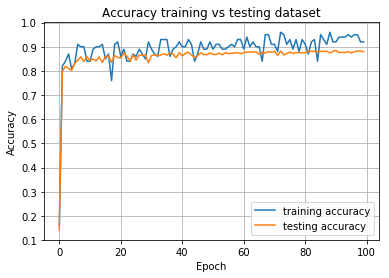

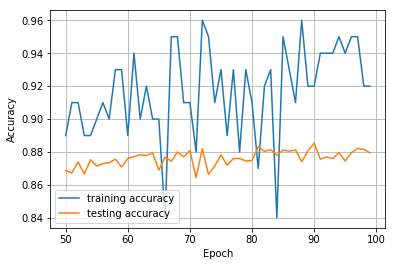

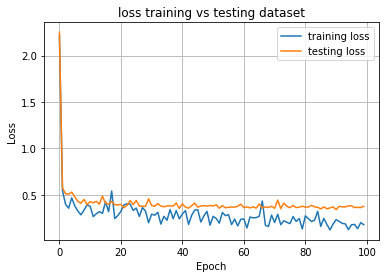

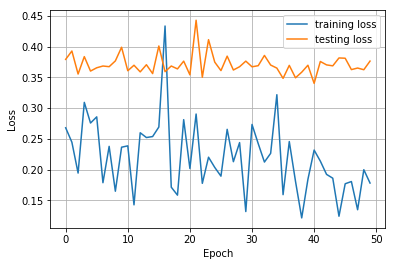

In [14]:
# 7. Plot and visualise the accuracy and loss

print("Max.train accuracy:"+str(max(train_a)))
print("Max.test accuracy:"+str(max(test_a)))

# Accuracy training vs testing dataset
plt.title('Accuracy training vs testing dataset')
plt.plot(train_a, label='training accuracy')
plt.plot(test_a, label='testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,int(training_iter/epoch_size))
plt.plot(x_range, train_a[zoom_point:], label='training accuracy')
plt.plot(x_range, test_a[zoom_point:], label='testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
plt.show()

# loss training vs testing dataset
plt.title('loss training vs testing dataset')
plt.plot(train_c, label='training loss')
plt.plot(test_c, label='testing loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(train_c[zoom_point:],label='training loss')
plt.plot(test_c[zoom_point:],label='testing loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
plt.show()